<a href="https://colab.research.google.com/github/Zibraan/My_ML_DL_Codes/blob/main/Portuguese_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portuguese Bank Marketing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

#### In this project, the Bank Marketing Dataset was used to build a model that can predict, based on a number of attributes, whether or not a person will make a deposit.

In [ ]:
# import library
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# Reading data and display
df=pd.read_csv('/content/drive/MyDrive/internship/bank-additional-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


### Observation
 #### 1.Above data set is not a stuctured format .So convert data set to a structured format

In [ ]:
# Reading data and display

df=pd.read_csv('/content/drive/MyDrive/internship/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
 # shape of the data
df.shape

(41188, 21)

#### Obsevation :- There are 41188 rows and 21 columns

In [ ]:
# data type info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Coloum name of the data
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### Observation
    1.There are 21 features
    

### Checking Missing Values

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Observation
    There is no missing values in the given dataset

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Observation
    1.Numerical data:'duration', 'campaign','pdays', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','previous', 'nr.employed'
    2.Categorical data: job, marital, education, default, housing, loan, contact, month, poutcome, y

In [ ]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
df.describe()  # discribe continous values

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['y'].value_counts()   # imbalance dataset ,which is our targer variable

no     36548
yes     4640
Name: y, dtype: int64

## Exploratory Data Analysis

#### Numerical variables

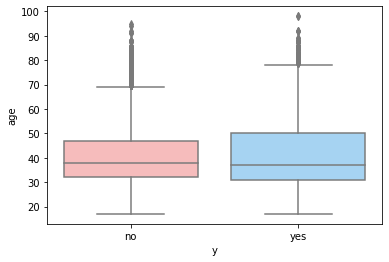

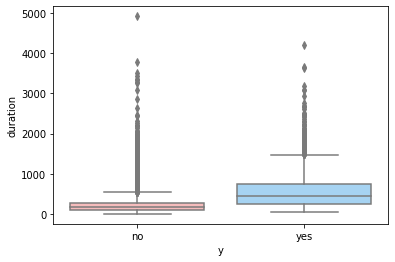

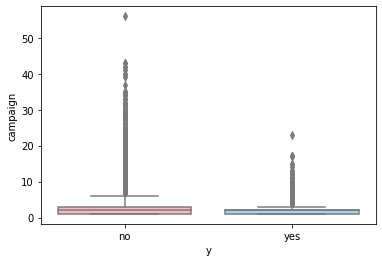

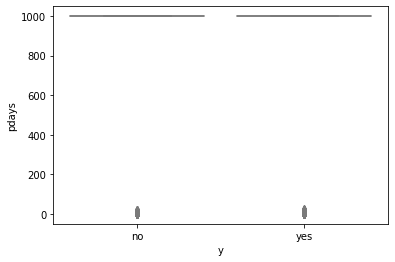

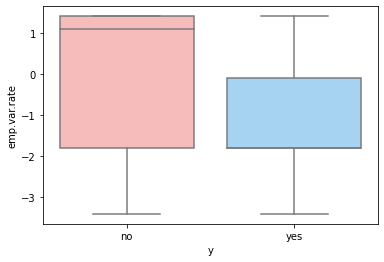

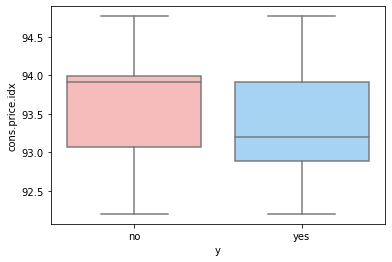

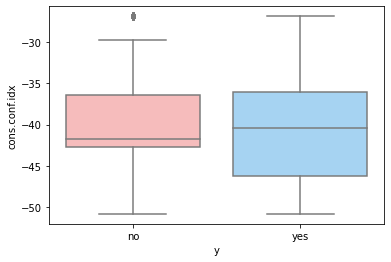

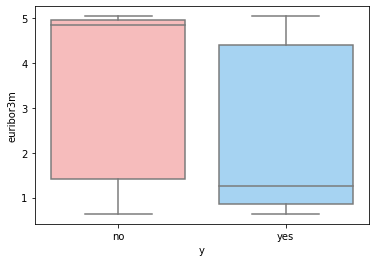

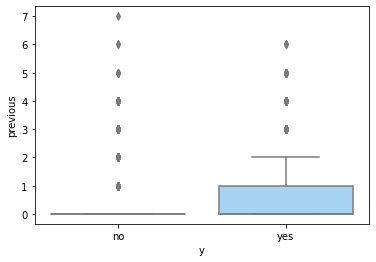

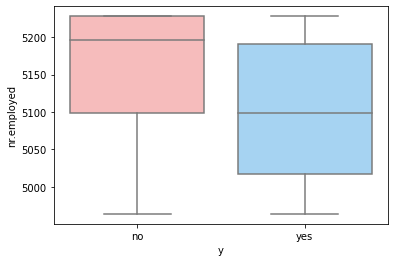

In [ ]:
num_var=['age',  'duration', 'campaign','pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','previous', 'nr.employed']
target=df['y']
for i in num_var:
    sns.boxplot(x=target,y=i,data=df,palette=['#ffb3b3',"#99d6ff"])
    plt.show()

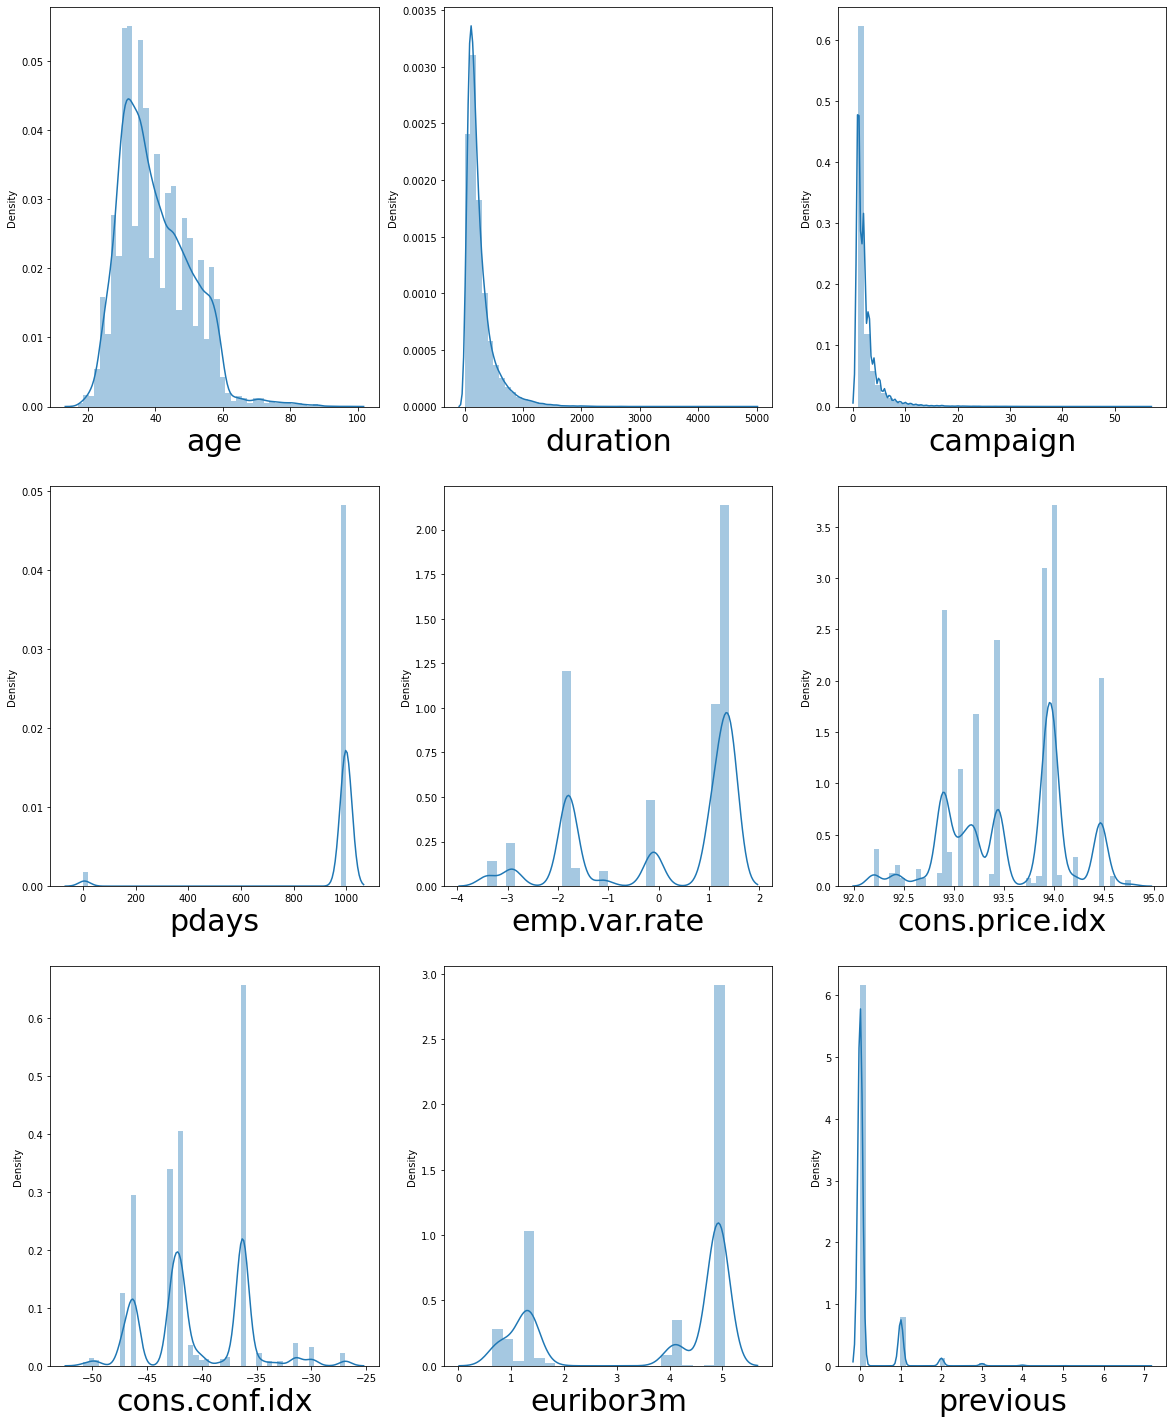

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in num_var:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=30)
    plotnumber+=1
plt.show()

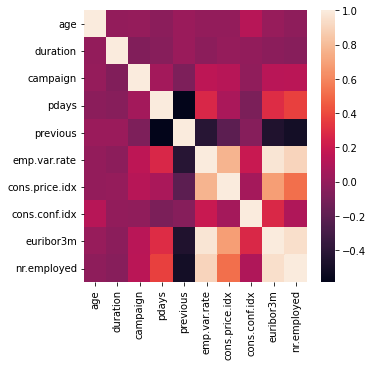

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())
plt.show()

###### Here features is highly correlated like 'emp.var.rate' and 'cons.cont.idx' and many more as it can be seen from Heatmap, so we need to take care of these

### EDA- Categorical variable

In [ ]:
# for categorical variable
cat_var=[i for i in df.columns if i not in num_var]
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

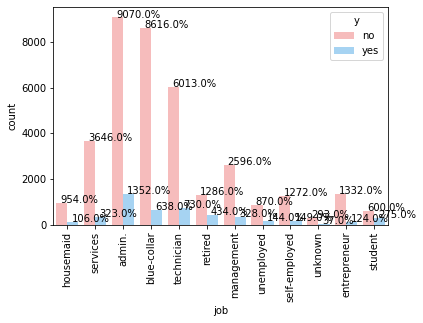

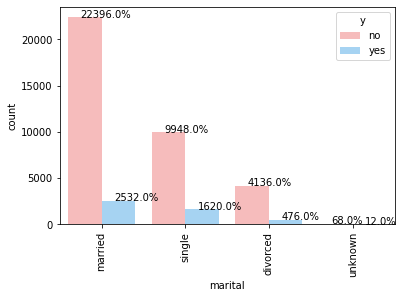

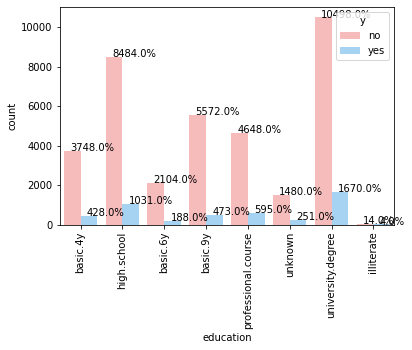

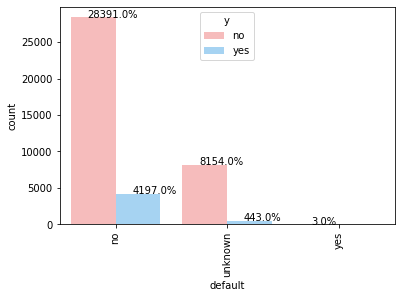

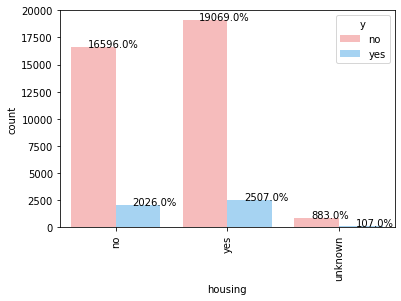

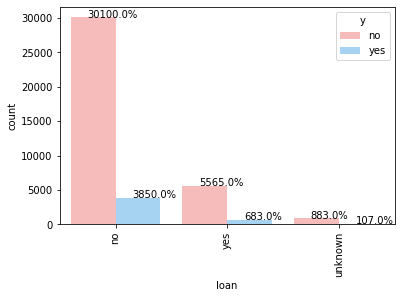

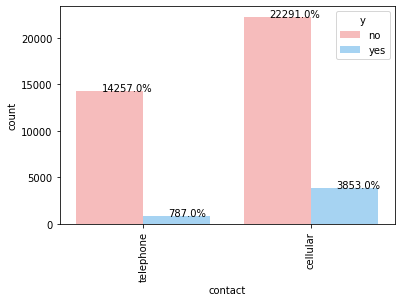

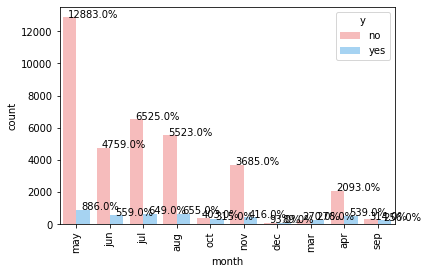

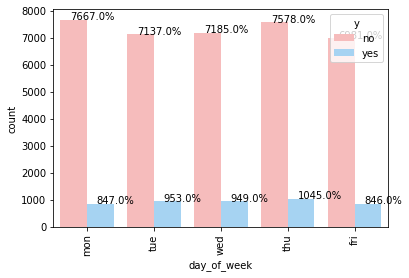

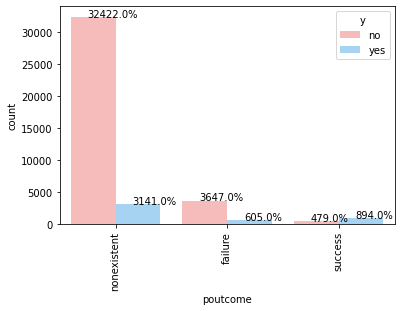

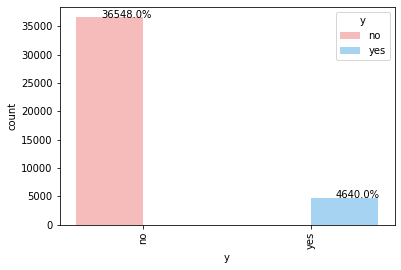

In [ ]:
target=df['y']
for i in cat_var :
    ax=sns.countplot(x=i,hue=target,data=df,palette=['#ffb3b3',"#99d6ff"])
    plt.xticks(rotation=90)
    for p in ax.patches:
       ax.annotate('{:0.1f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
    plt.show()


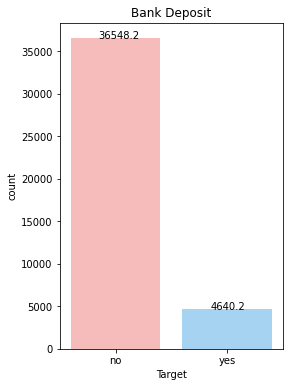

In [ ]:
plt.figure(figsize=(4,6))
ax=sns.countplot(x='y',data=df,palette=['#ffb3b3',"#99d6ff"])
plt.title('Bank Deposit')  # Title given
plt.xlabel('Target')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()+0.25), (p.get_x()+0.25, p.get_height()))


# for p in ax.patches:
#     ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))



### Observation
     1.Bank deposit product suscribed by 4640 people out of 41188 .(11.26%)
     2.Data set is imbalanced data

In [ ]:
df.y.value_counts().sum()

41188

## Standardization of data set

In [ ]:
from sklearn.preprocessing import StandardScaler
df_bank_num= df.copy()  # Copy original df to df_bank_num
scaler=StandardScaler()
num_cols=['age',  'duration', 'campaign','pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','previous', 'nr.employed']
df_bank_num[num_cols]=scaler.fit_transform(df_bank_num[num_cols])
df_bank_num=df_bank_num.drop(['job','marital','education','default','housing','loan','contact',
                              'month','day_of_week','poutcome','y'], axis=1)
df_bank_num.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Encode categorical Features

In [ ]:

df_target= df.copy()



df_target = df_target.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

# Encode target value yes to 1 and no to 0 using manual encoding
df_target['y'] = df_target['y'].apply(lambda x: 1 if x == 'yes' else 0)

df_target.head(5)



,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_enco=pd.get_dummies(df)
df_enco=df_enco.drop(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],axis='columns')
df_enco.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
merged=pd.concat([df_enco,df_bank_num],axis='columns')
df_final=merged.drop(['y_no'],axis=1)


### Spliting dataset for training and testing

In [ ]:
x=df_final.drop("y_yes",axis=1) # Select features
y=df_final['y_yes'] # Select target

### Balancing data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)  # Apply sampling on target variable
print(Counter(y_sm))

Counter({0: 36548, 1: 4640})
Counter({0: 36548, 1: 36548})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,shuffle=True,test_size=0.25,random_state=42)

In [ ]:
print('size of training feature',x_train.shape)
print('size of testing feature',x_test.shape)
print('size of training target',y_train.shape)
print('size of testing target',y_test.shape)

size of training feature (54822, 63)
size of testing feature (18274, 63)
size of training target (54822,)
size of testing target (18274,)


### Model Building

## Decision Tree

#### A decision tree is a diagram in the shape of tree that is used to choose a way to proceed. Each branch of the tree indicate a possible decision,occurrence or response.

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score #importing mertics to check model performance

In [ ]:
def evaluate_model(model,x_test,y_test):
    from sklearn import metrics
# Predict Test Data
    y_predict = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_predict)
    prec = metrics.precision_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    f1 = metrics.f1_score(y_test, y_predict)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Accuracy: 0.9237714786034803
Precision: 0.9196040034812881
Recall: 0.9281871088173932
F1 Score: 0.9238756216186677
Area Under Curve: 0.9237859292314303
Confusion Matrix:
 [[8428  739]
 [ 654 8453]]


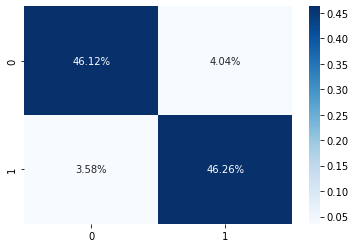

In [ ]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dt, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

Accuracy: 0.9402976907081099
Precision: 0.9601607347876004
Recall: 0.918304600856484
F1 Score: 0.9387663467474885
Area Under Curve: 0.9891283668225772
Confusion Matrix:
 [[8820  347]
 [ 744 8363]]


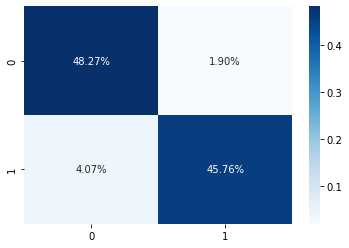

In [ ]:
log_eval=evaluate_model(log_reg,x_test,y_test)
print('Accuracy:', log_eval['acc'])
print('Precision:', log_eval['prec'])
print('Recall:', log_eval['rec'])
print('F1 Score:', log_eval['f1'])
print('Area Under Curve:', log_eval['auc'])
print('Confusion Matrix:\n', log_eval['cm'])

## Random Forest

#### A technique called random forest ,also know as random decision forest,building several decision tree during traing phases.The decision made by majority of the tree refers to the final decision .

In [ ]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier

# Building random forest model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

Accuracy: 0.9558388967932582
Precision: 0.9366582491582491
Recall: 0.9774898429779291
F1 Score: 0.9566385470958035
Area Under Curve: 0.9938612871427892
Confusion Matrix:
 [[8565  602]
 [ 205 8902]]


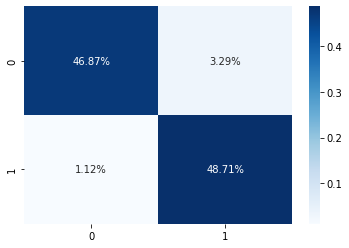

In [ ]:
rf_eval= evaluate_model(rf,x_test,y_test)
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

## Naive Bayes

###### Naive Bayes is a simple technique for constructin classifires . Model that assign class labels to problem instences, reprsented as vector of featurs values, where class labels are drawn from some finat set.There not one single algorithm for traing such classifiers,but a family of algorithm based on a common principle.All Naives Bayes classifire assume that the value of a particular feature is independent of the value of any othe feature,given the class variable. Below are the Bayes theorem formula:
                             P(A/B)=P(B/A)P(A)/P(A)/P(B)

In [ ]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
# Building Naive Bayes model
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

Accuracy: 0.7595490861333042
Precision: 0.710834749932898
Recall: 0.8724058416602614
F1 Score: 0.783376059948728
Area Under Curve: 0.8459742085024832
Confusion Matrix:
 [[5935 3232]
 [1162 7945]]


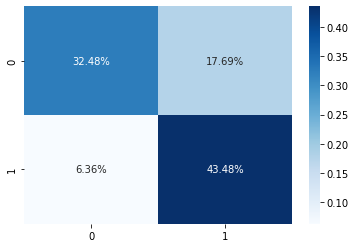

In [ ]:
nb_eval=evaluate_model(nb,x_test,y_test)
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])


## K-Nearest Neighbours

#### K-Nearest Neighbours (KNN) classify new data by finding K-numbers of closest neighbours from the traing data and then decid the class based on the majority of its neighbours. For example if the image below where k=3 majority of it's neighbour is classified as B,But when k=7, the majority will change to A.

In [ ]:
## KNN model
from sklearn.neighbors import KNeighborsClassifier
# Build KNN model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy: 0.9239356462733939
Precision: 0.871831936012335
Recall: 0.9934116613593938
F1 Score: 0.9286594128515705
Area Under Curve: 0.9677046951429623
Confusion Matrix:
 [[7837 1330]
 [  60 9047]]


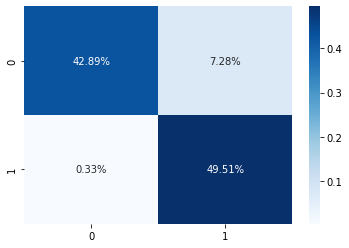

In [ ]:
knn_eval=evaluate_model(knn,x_test,y_test)
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])


## Model Comparison
##### After building all the model ,we now compare how well each model performs. In order to do this we create two charts to display the value of accuracy,precision ,recall and f1 score of our model and we secondly formulate a line chart to show the AUC of all our models

In [ ]:
pwd

'/content'